# Bikes

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype


In [70]:
df = pd.read_csv("C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\train.csv")
test2 =pd.read_csv("C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\test.csv")

In [16]:
df.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [17]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [18]:
df.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [26]:
df2 = df.copy()
df2['cnt'] = df2['cnt'].astype('category')

C:\Users\Mayer\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Mayer\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Mayer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mayer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

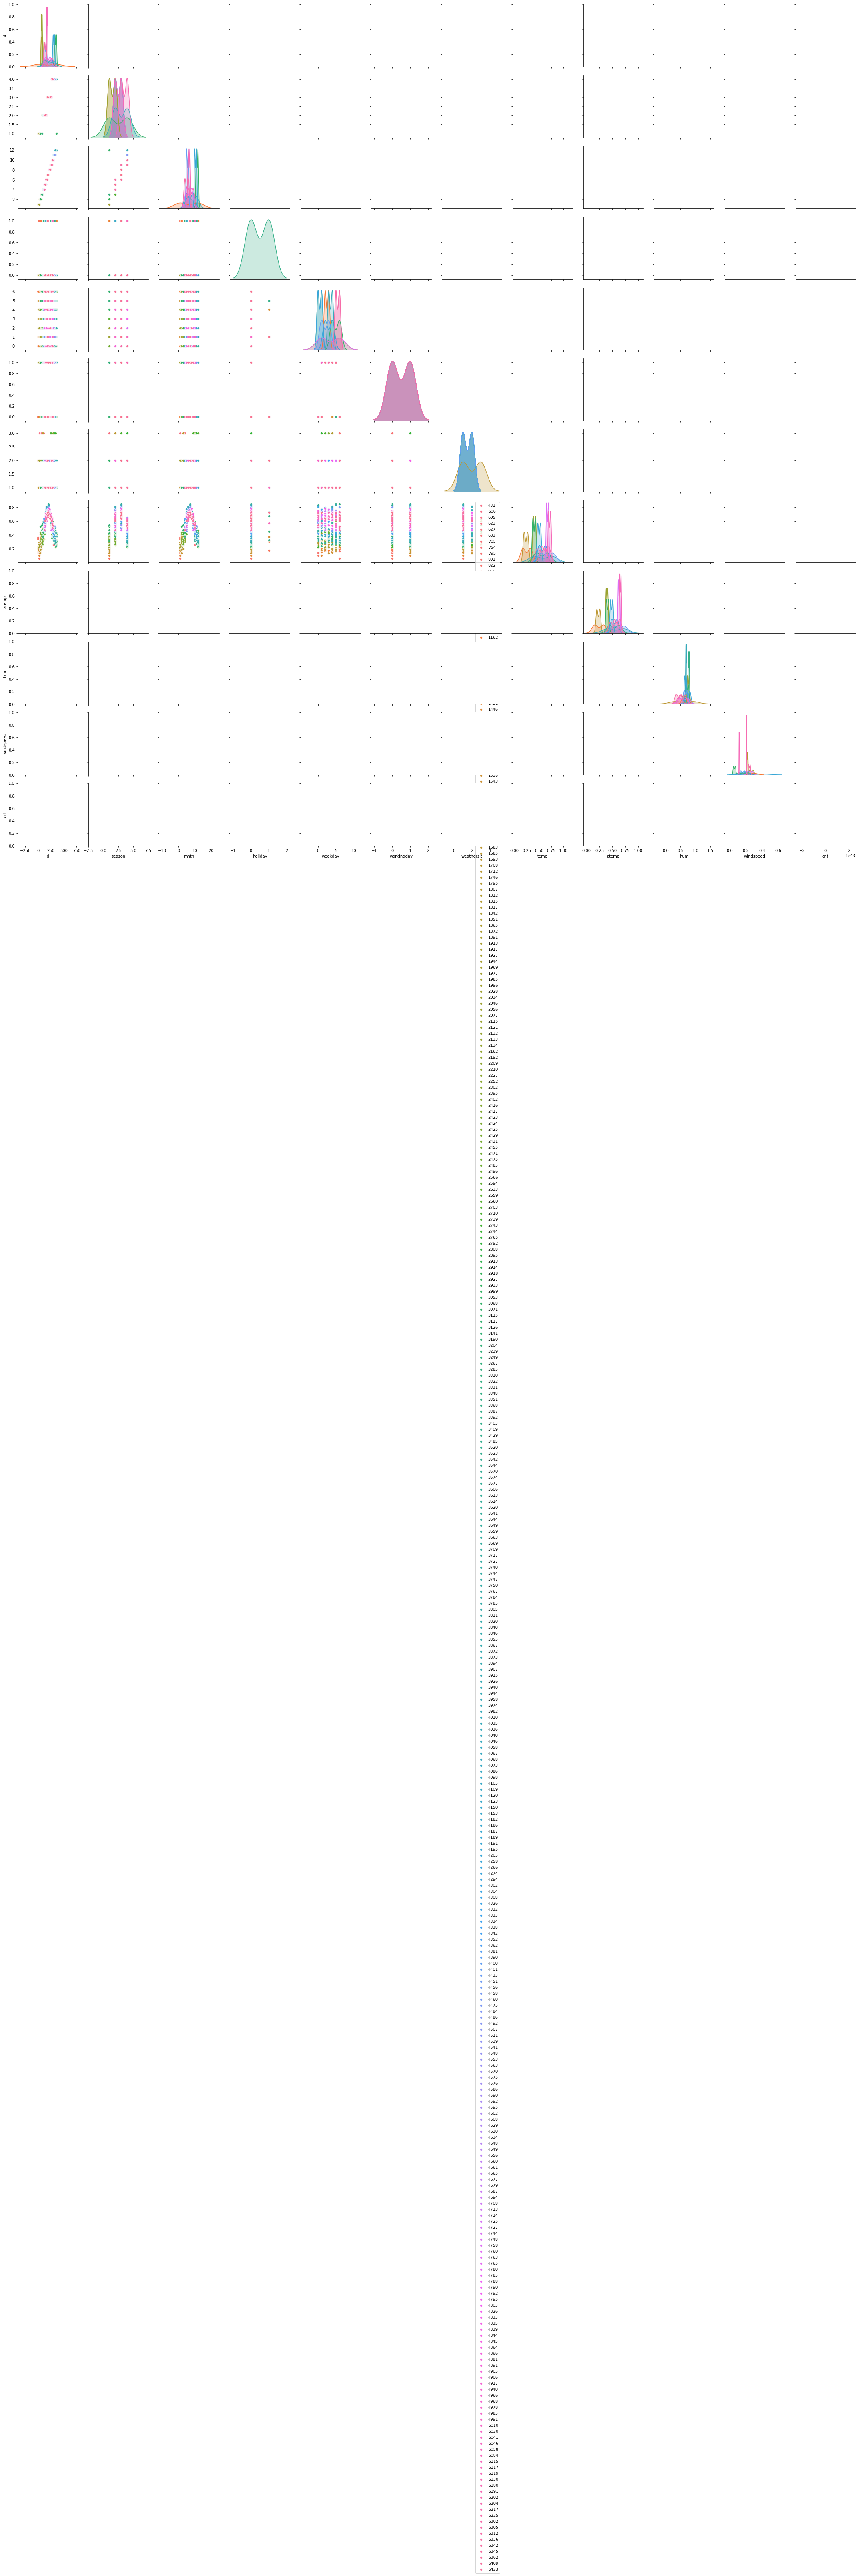

In [28]:
sns.pairplot(df,hue="cnt")

## k-means

In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,0:8])
    wcss.append(kmeans.inertia_)
    

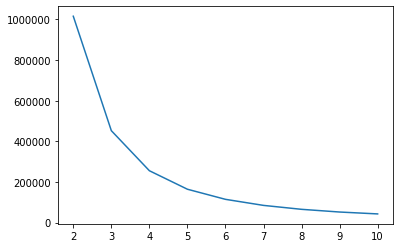

In [25]:
sns.lineplot(x=range(2, 11), y=wcss)

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,0:8])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [30]:
df2['cluster'] = kmeans.labels_

/home/tomas/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tomas/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


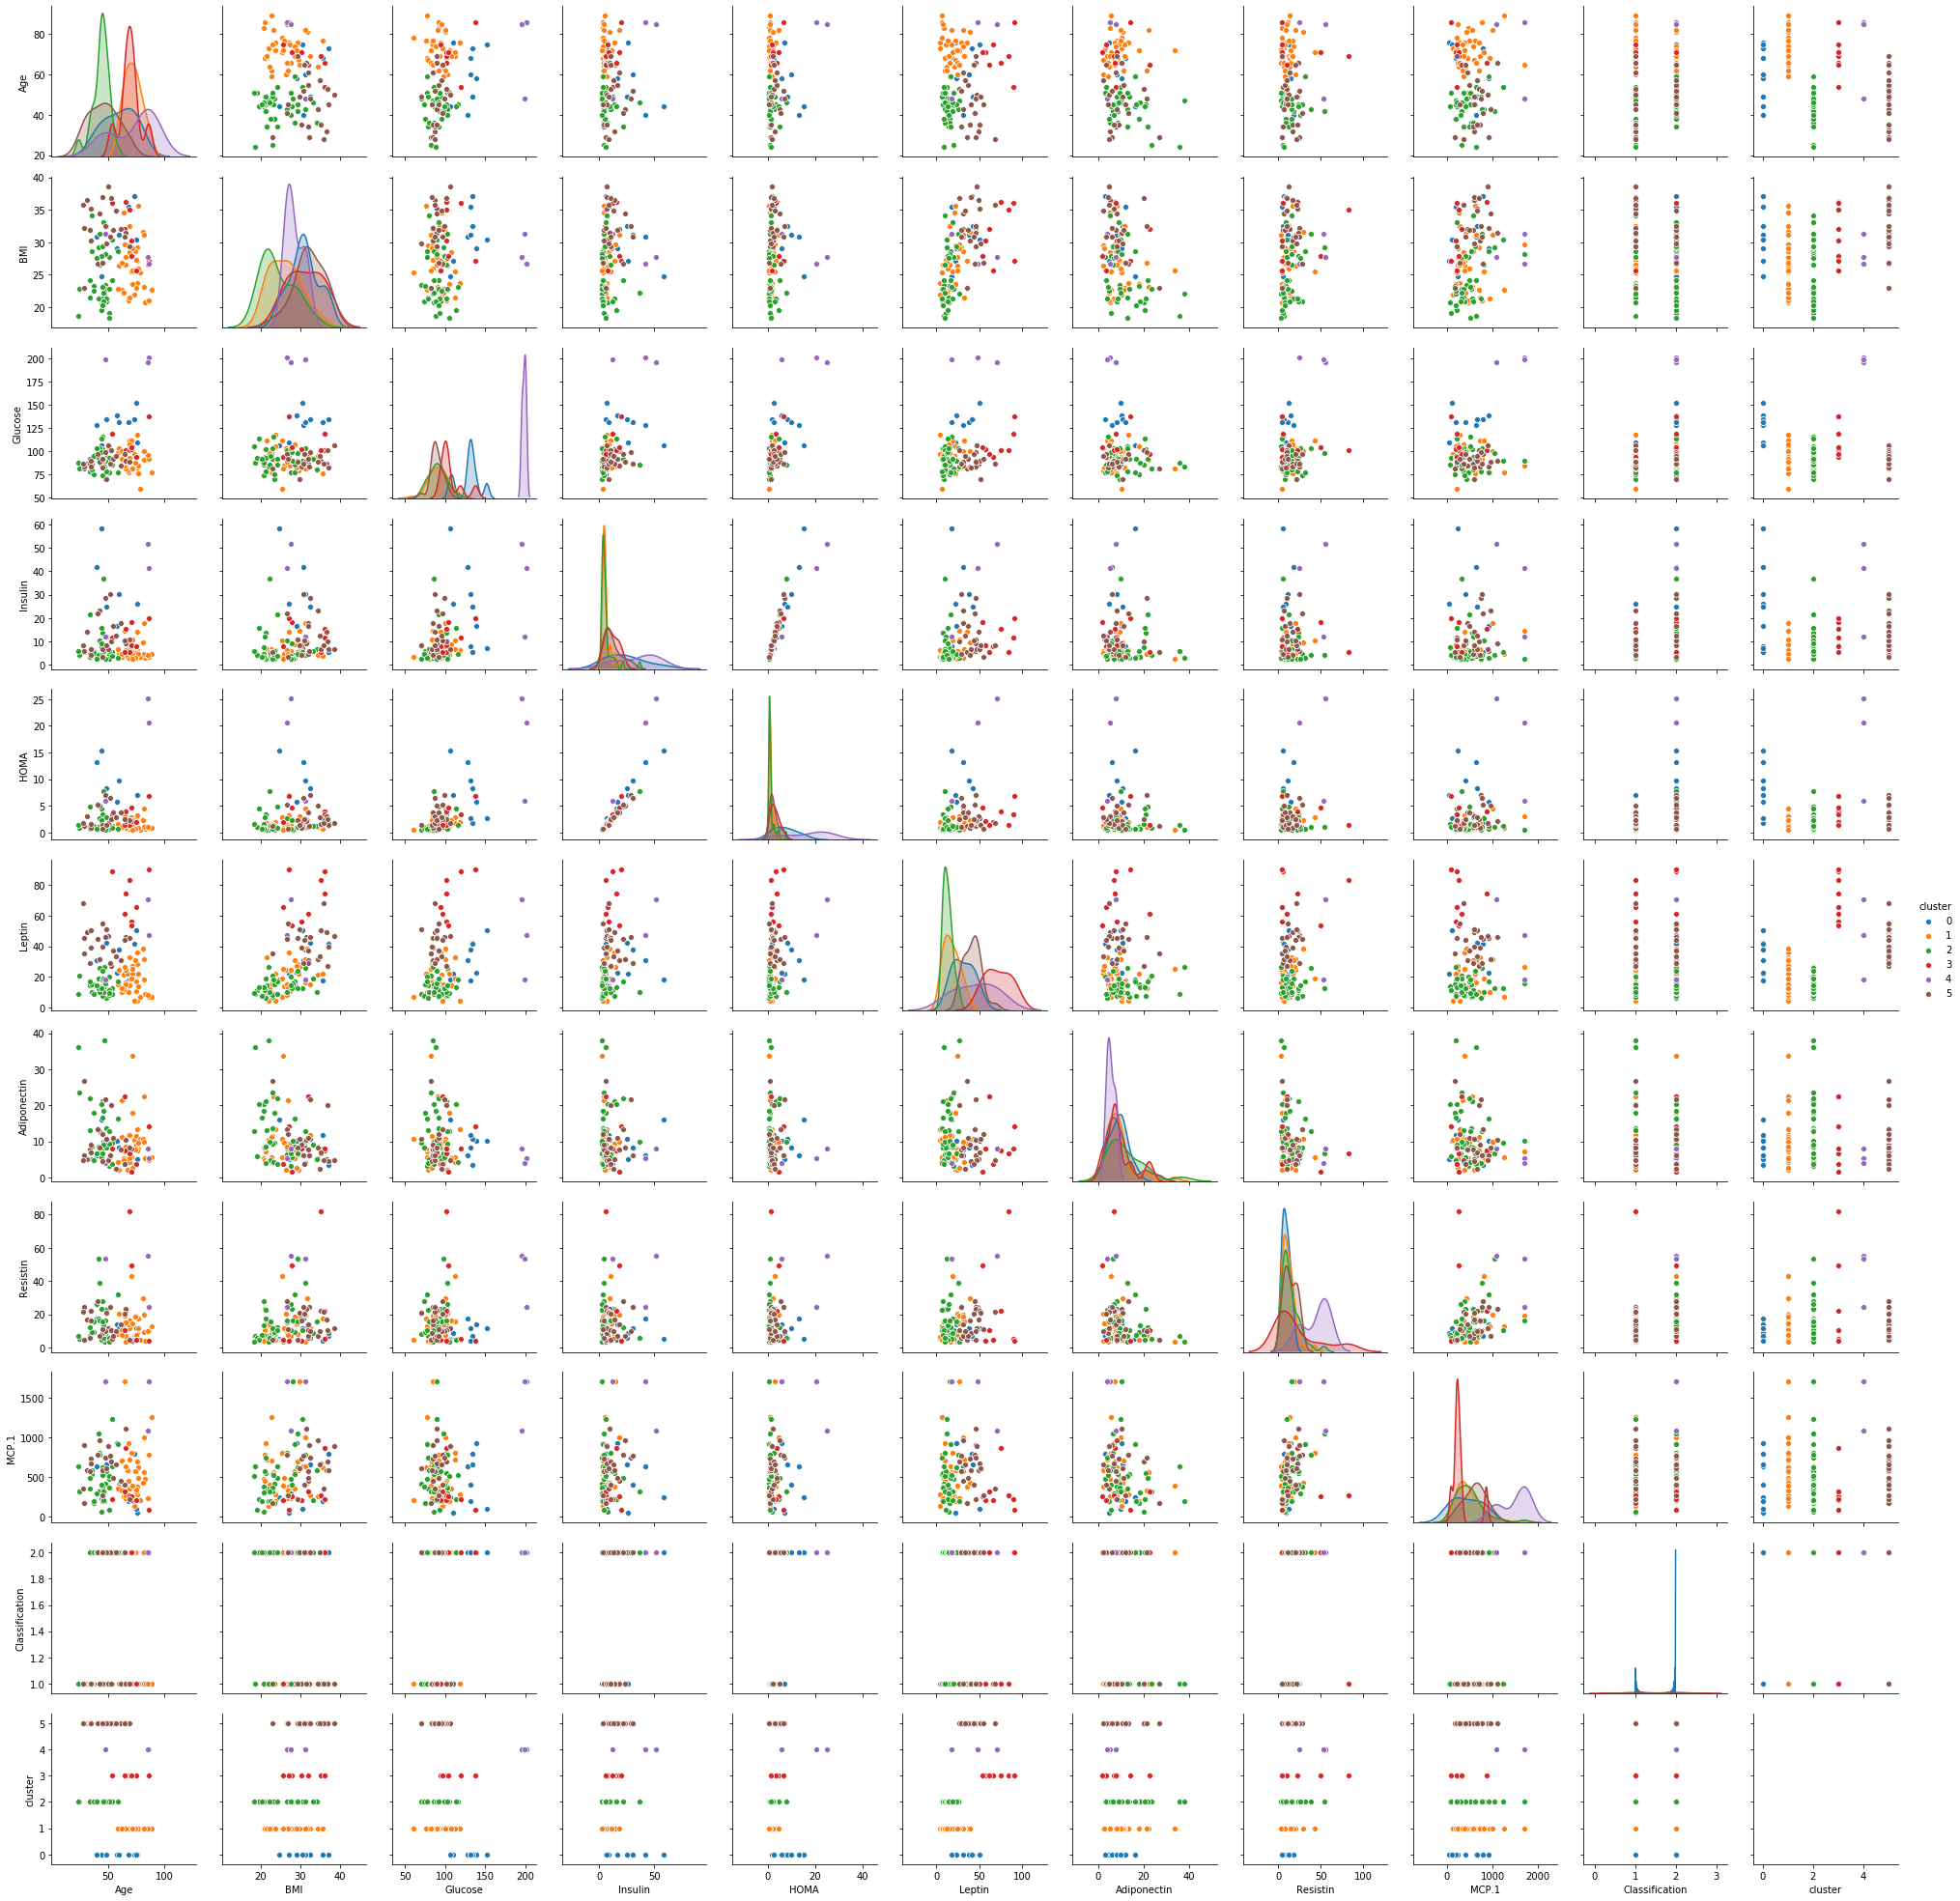

In [122]:
sns.pairplot(df2,hue="cluster")

In [31]:
pd.crosstab(df2.cluster,df2.cnt)

cnt,431,506,605,623,627,683,705,754,795,801,...,5362,5409,5423,5511,5515,5538,5805,5895,5923,6043
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
4,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [33]:
linked = linkage(df.iloc[:,0:8], 'ward')

labelList = range(2, 11)

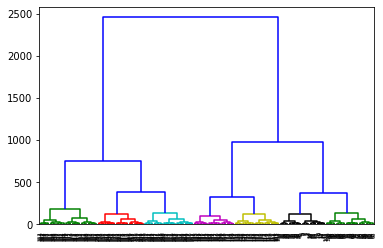

In [37]:
dn = dendrogram(linked,color_threshold=250)


In [38]:
df2['hcluster'] = fcluster(linked, 7, criterion='maxclust')

In [39]:
pd.crosstab(df2.hcluster,df2.cnt)

cnt,431,506,605,623,627,683,705,754,795,801,...,5362,5409,5423,5511,5515,5538,5805,5895,5923,6043
hcluster,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6,7
cluster,,,,,,,
0,63,0,8,0,0,0,0
1,0,24,0,45,4,0,0
2,0,0,0,0,45,0,29
3,0,27,46,0,0,0,0
4,0,0,0,0,0,50,24


In [41]:
df2.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cluster,hcluster
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,2.016438,3.898630
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1.412174,2.061719
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,0.000000,1.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,1.000000,2.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,2.000000,4.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,3.000000,6.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,4.000000,7.000000


In [46]:
df2.head()
list(df2.columns)

['id',
 'season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'cluster',
 'hcluster']

# Partition of the data

In [43]:
from sklearn.model_selection import train_test_split

In [47]:
nv = ['id','season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
nc = ['cluster','hcluster']
yv = 'cnt'

In [49]:
X = df2.loc[:,nv]
y = df2.cnt

In [50]:
X.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [51]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: category
Categories (352, int64): [431, 506, 605, 623, ..., 5805, 5895, 5923, 6043]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

C:\Users\Mayer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
yhat1 = mod1.predict(X_train)
yhat1

array([6043, 5312, 3974, 4744, 4195, 4195, 4195, 1167, 4195, 1842, 5312,
        705, 3368, 4195, 3485, 3485, 1842,  705,  705, 3485, 2431,  822,
       5312, 3974, 5312, 5312, 4195, 3974, 2077, 5117, 3190, 3974, 5312,
       4401, 3071, 3974, 4940, 4195, 4195, 4195, 2416, 4401, 4744, 4401,
       2927, 5312, 2739, 3126, 1606, 4195, 5312, 4195, 4401, 1944, 3974,
       4195, 4195, 4401, 3926, 4906, 3068, 5312, 3926, 3974, 5041, 1098,
       3190, 3351, 5312, 1349, 5312, 4649, 1693, 3974, 3190, 3190, 1606,
       4401,  506, 1944, 4195, 4195, 4195, 5312, 4401, 4195,  795, 3485,
       3974, 4195, 4195,  705, 2431, 4195, 4401, 3974, 5312, 3485,  506,
       4195,  959, 4195, 4302, 1842, 4195, 4195, 4195, 4401, 2431,  795,
       4195, 3485,  705, 3974, 3974, 4195, 2416, 3974, 4195, 5312, 4195,
       3520, 1623, 4649, 4195, 4195, 1167, 4195, 4195, 4195, 1317, 4401,
       2739, 1011, 5312, 2739, 2431, 3974, 4195, 4195, 5312, 5312, 5312,
       1321, 4906, 1360, 4195, 5312, 4195, 3974,  7

In [56]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[1.12596542e-06, 9.29524781e-08, 1.30409695e-02, ...,
        4.96010138e-03, 4.10430172e-03, 3.19694431e-02],
       [2.40590466e-05, 2.54189665e-07, 4.37841141e-03, ...,
        4.33497945e-03, 1.09416377e-02, 1.45074034e-03],
       [1.15602598e-04, 8.34120221e-06, 8.80626812e-03, ...,
        3.32380719e-03, 8.19937039e-03, 2.21215195e-03],
       ...,
       [3.42607231e-07, 7.71113377e-09, 7.43375397e-03, ...,
        7.31785288e-03, 3.68311409e-03, 8.30223466e-03],
       [1.10920271e-05, 6.39446807e-08, 3.70274957e-03, ...,
        4.93042093e-03, 1.20931843e-02, 1.30590865e-03],
       [6.52577261e-05, 1.65435379e-05, 1.29986244e-02, ...,
        5.42032652e-03, 3.60048604e-03, 7.30733160e-03]])

In [57]:
pd.crosstab(y_train,yhat1)

col_0,506,705,795,822,959,985,1011,1098,1107,1162,...,4401,4649,4744,4906,4940,5041,5117,5312,5511,6043
cnt,,,,,,,,,,,,,,,,,,,,,
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
795,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
959,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
981,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
985,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
### Accuracy:
mod1.score(X_train,y_train)

0.1917808219178082

In [62]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

ValueError: multiclass format is not supported

In [63]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.0


col_0,431,506,705,795,959,981,1005,1011,1107,1115,...,3190,3520,3974,4195,4294,4401,4649,4744,4906,5312
cnt,,,,,,,,,,,,,,,,,,,,,
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
623,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1162,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test)
      }}

In [293]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [66]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.1917808219178082,
  'accuracy-Test': 0.0}}

In [71]:
p1 = mod1.predict(test2)

In [72]:
p1

array([3867, 2659, 2999, 2659, 2999, 2999, 2999, 3867, 1162, 2999, 2659,
       2659, 2999, 2999, 3867, 2659, 2659, 2999, 2999, 2999, 1115, 1162,
       1162, 2999, 2999, 2659, 2999, 2999, 3867, 3867, 2999, 2999, 2999,
       2999, 1115, 1162, 3867, 2999, 2999, 2999, 2999, 1115, 3867, 3867,
       1162, 2999, 2999, 2999, 2999, 1162, 3867, 2999, 2999, 2999, 2999,
       2999, 3867, 3867, 2999, 2999, 2999, 2999, 2999, 3867, 3867, 2999,
       2999, 2999, 2999, 2999, 3867, 3867, 2999, 2999, 2999, 2999, 2999,
       1162, 3867, 2999, 2659, 5202, 2659, 1115, 3867, 3867, 3867, 2659,
       5202, 2659, 1115, 3867, 3867, 3867, 2659, 2659, 5202, 3068, 3867,
       3867, 3867, 2659, 2659, 5202, 3068, 3867, 3867, 3867, 2659, 2659,
       2999, 3068, 1162, 3867, 3867, 2659, 2659, 5202, 2659, 3867, 3867,
       2659, 2999, 2659, 2999, 1115, 3867, 3867, 2659, 2659, 2999, 2999,
       3068, 3867, 3867, 2659, 2999, 2999, 2999, 3068, 3867, 3867, 2659,
       2659, 2999, 2999, 3068, 3867, 3867, 3867, 26

In [73]:
import pandas as pd 
pd.DataFrame(p1).to_csv("prediction-8-Knn with calss-2020-29-01.csv")